# 3 AA evolution simulation

In [103]:
import adam_functions as adm
import numpy as np
import random
import matplotlib.pyplot as plt

The function below, ```AA_map(seq)``` is used for converting a string into a point in protein space $\mathcal{P}^N$. 

In [2]:
AAs = 'ACDEFGHIKLMNPQRSTVWY'
nums = np.arange(1,21,1)

mapping = {x[0] : x[1] for x in zip(AAs,nums)}

def AA_map(seq):
    """
    Uses provided mapping dictionary to generate 3D coords for a given amino acid sequence
    """
    return tuple([mapping[x] for x in seq])


In [72]:
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'}

# for the mutatable set, we will assume that amino acid i in a sequence S is encoded by all the possible codons
# encoding that amino acid; thus, the set of possible mutations will be the set of codons accessible by a single 
# substitution from any of the redundant codons encoding the particular amino acid i. 

redundant = {}
for i in AAs: 
    n  = [key for key, value in gencode.items() if value == i]
    new = {i: n}
    redundant.update(new)

# in the mutable set, we want to find the set of amino acids A accessible from an amino acid i with only 1
# nucleotide substitution. 
mutatable_set = {}

In [74]:
len(gencode)

64

In [78]:
def accessible_SNPs(codon): 
    """From a given codon, returns a list of all possible codons accessible by a single nucleotide mutation."""
    codon = list(codon)
    accessibles = []
    nucleotides = 'AGTC'
    for position in range(len(codon)): 
        for j in nucleotides: 
            cp_codon = codon.copy()
            cp_codon[position] = j
            new_codon = cp_codon
            new_codon = "".join(new_codon)
            accessibles.append(new_codon)
    return accessibles

def codon2amino(codonlist): 
    """Takes a list of codons. Returns the list of amino acids these codons code for"""
    aa_s = [gencode.get(i) for i in codonlist]
    non_redundant_aas = list(set(aa_s))
    return non_redundant_aas

The function below, ```stochastic_mutate(seq,*args,num_AAs=20,concurrent_mutations=1)``` is used for mutating a sequence randomly within the constraints imposed by the underlying codons (and in the future, perhaps an evolutionary metric?). 

In [83]:
def stochastic_mutate(seq,*args,concurrent_mutations=1):
    """
    Assumes that you're only using the 20 canonical amino acids

    concurrent_mutations : int 
        
        Enables multiple positions to be mutated simultaneously
    
    num_AAs              : int
        
        Lists total number of amino acid possibilities
    """
    seq1      = list(seq)
    seq2      = seq1.copy()                                     # If this step is removed then it runs into a mutable default error where you have copies of the same sequence list
    many_muts = random.randint(1,concurrent_mutations)         # Determines how many mutations will be made randomly (n.b will always make one)
    for pos in random.sample(range(len(seq2)),many_muts):
        encodons       = list(redundant.get(seq1[pos]))
                                                                        #encodons are the codons encoding a particular amino acid
        access_AAs = [codon2amino(accessible_SNPs(i)) for i in encodons]
        access_AAs_noStop = [j for i in access_AAs for j in i if '_' not in j]
        non_redundant_AAs = list(set([j for i in access_AAs_noStop for j in i]))
        seq2[pos] = random.sample(non_redundant_AAs, 1)
    seq2 = "".join([j for i in seq2 for j in i])     
    return seq2 

# in the future, instead of using random.sample to pick the possible amino acids, we should use the probabilities 
# from substitution matrices like the BLOSUM or LG matrices. In this way, as we run the simulation many many times,
# the simulation will be biased not only by the evolutionary pressure but also the probabilitioes of substitution,
# which is probably also important (unless it is exhaustive???). I'm not totally sure on this -- maybe we should 
# discuss this???

In [88]:
for i in (range(1000)): 
    print(stochastic_mutate('SAE'))   #we should do this perhaps so the results follow the substitution matrix 
                                      # probability distribution

SAA
SEE
SAD
FAE
STE
YAE
SEE
SAV
STE
AAE
PAE
SDE
SPE
SAQ
YAE
TAE
SSE
SAQ
RAE
SDE
SGE
SAG
SAE
SEE
SDE
SAE
CAE
SAE
SAD
SAE
SAD
FAE
IAE
SVE
SAD
IAE
SGE
FAE
SAV
SGE
SAE
FAE
SAA
PAE
WAE
SAQ
STE
SAE
IAE
SGE
CAE
SVE
STE
SAV
SAK
SEE
GAE
STE
SAK
TAE
SAQ
SAK
FAE
SPE
PAE
SEE
SSE
SAE
SVE
AAE
SSE
GAE
SAG
SAQ
SPE
SAE
FAE
SSE
SVE
LAE
SAE
CAE
SAG
SAV
SPE
SDE
NAE
RAE
CAE
SVE
RAE
SPE
SAA
SAA
IAE
SDE
FAE
SAQ
SAG
SAE
TAE
SVE
SAA
STE
SAE
SDE
SAG
SEE
SAG
SGE
SGE
SAE
CAE
GAE
YAE
SAE
SAA
FAE
SPE
SAG
SSE
SSE
SEE
SAV
AAE
SPE
SVE
SPE
RAE
IAE
CAE
NAE
SAV
RAE
NAE
GAE
GAE
SAV
SAK
SAD
SGE
SDE
TAE
SPE
NAE
SAE
SAD
SGE
SAQ
CAE
SAD
SAD
SGE
IAE
SPE
NAE
CAE
SAD
SAE
SAK
SAQ
SAQ
TAE
WAE
SAA
STE
PAE
SSE
SAQ
SEE
SGE
SPE
SAG
WAE
LAE
RAE
NAE
SAA
STE
YAE
SEE
SPE
RAE
SAE
RAE
SEE
SPE
SPE
RAE
SAE
SEE
STE
SAA
SAG
SAQ
CAE
SAG
SAV
YAE
SAE
SAE
GAE
AAE
STE
TAE
CAE
SVE
RAE
SPE
SAA
SGE
SGE
SAE
SAK
SPE
YAE
SAE
SAQ
STE
NAE
SAA
YAE
SPE
SAV
SAE
SAG
SAA
SAA
SAE
STE
STE
SAG
SSE
LAE
SPE
SGE
LAE
SVE
SAE
WAE
SVE
SVE
IAE
STE
SAG
SAD
SAE
SDE
RAE
IAE


The function below ```evaluate_E(sequence)``` evaluates the fitness of a given sequence against some fitness metric. In the protypical case below, the fitness metric is simply a dictionary of amino acids with numbers (e.g. ionisation energies). In the real case, it might be Rosetta stabilities for a structure (in which case the function ```evaluate_E``` will have to be completely re-written). Evaluate uses a simple average fitness method. 

In [89]:
fitnesses = [np.random.uniform(0,200) for i in range(20)]

In [90]:
fitness_metric = {x[0] : x[1] for x in zip(AAs,fitnesses)}


In [91]:
def evaluate_E(sequence, fitness_metric):
    """Takes an input sequence (str) and a fitness_metric (simple case)"""
    seq = str(sequence)
    individual_fitness = [fitness_metric.get(i) for i in seq]
    average_fitness = np.mean(np.array(individual_fitness))  #simply get mean fitness
    return average_fitness

We run the fitness 

In [100]:
def doMC(seed_sequence, fitness_metric, fitness_threshold, convergence_criterion): 
    """MC algorithm for evolving proteins"""
    check_convergence = []
    trajectory = []
    fitnesses  = []
    iterations  = []
    
    seqN = seed_sequence
    iter_no = 1
    while len(check_convergence)<convergence_criterion:
        iterations.append(iter_no)
        trajectory.append(seqN)
      #  print(seqN)
        N_fitness    = evaluate_E(seqN, fitness_metric)      # evaluate initial sequence's fitness
        fitnesses.append(N_fitness)
        seq_tN1      = stochastic_mutate(seqN)               # mutate the sequence (i.e. make a move) seq_tN1 
        #print (seq_tN1)
        tN1_fitness  = evaluate_E(seq_tN1, fitness_metric)   # evaluate new sequence's fitness
        
        fitness_diff = tN1_fitness - N_fitness               # find difference in fitness. If positive, accept. 
        
        if (fitness_diff>0) or (abs(fitness_diff)<fitness_threshold):           #If positive, accept. If negative, accept if absval lower than threshold. 
            seqN = seq_tN1
        else:                                                # else statement unnecessary, but makes it clear
            seqN = seqN 
        
        if trajectory[-1] == seqN:                           # if seqN doesn't change in this iteration, we append a 1 to check_convergence
            check_convergence.append(1)                      # The idea is that if seqN doesn't change for convergence_criterion consecutive iterations, we might have converged
        else: 
            check_convergence = []                           # Because we are only interested in consecutive iterations 

        iter_no += 1
        
    return (trajectory, fitnesses, iterations)
        
    
# In the future, we should use a Metropolis-Hasting criterion. I need to read up on this. 

In [132]:
GAG_traj = doMC('GAG', fitness_metric, 10, 30) 


<IPython.core.display.Javascript object>


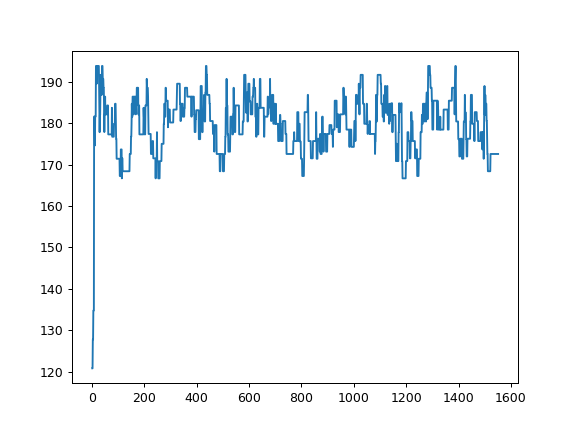

In [133]:
plt.plot(GAG_traj[2], GAG_traj[1])

In [134]:
GAG_phase_space = np.array([AA_map(i) for i in GAG_traj[0]])

<IPython.core.display.Javascript object>


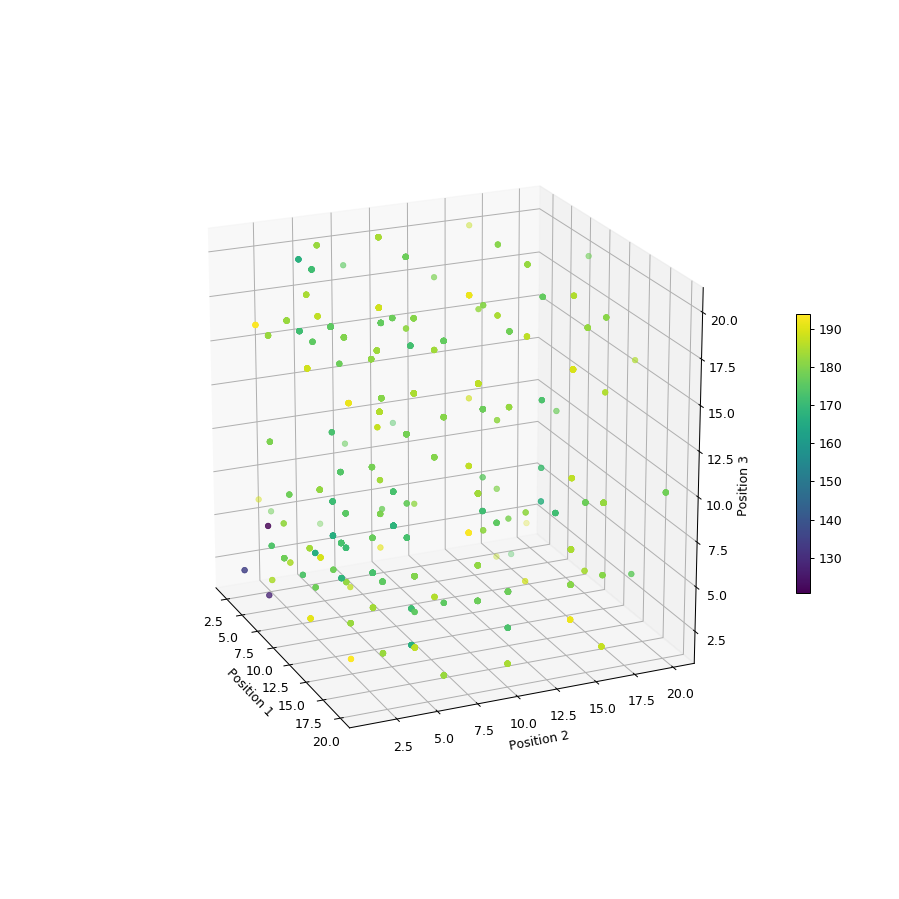

In [149]:
%matplotlib notebook
x,y,z = GAG_phase_space[:,0], GAG_phase_space[:,1], GAG_phase_space[:,2]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111,projection="3d")
ax1.set_zlabel("Position 3")
ax1.set_ylabel("Position 2")
ax1.set_xlabel("Position 1")
im = ax1.scatter(x,y,z,marker="o",c=GAG_traj[-2], cmap='viridis', linewidth=0.5)
plt.colorbar(im, ax=ax1, fraction=0.02, pad=0.04)
